In [1]:
# all the imports
%pylab inline

from visual_cryptography.visual_cryptography import (ImageLayer,
                                                     produce_image_layer_from_real_image)



pylab.rcParams['figure.figsize'] = (18.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
black = 1
white = 0

def plot_matrix(data, title="", ax=None):
    if ax is None:
        fig, ax = pylab.subplots()
    ax.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
    if title:
        ax.set_title(title)
    ax.axis('off')
    #pylab.show()

def do_not_show_axis(ax):
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

def plot_function(f, xmin=-10, xmax=10, ax=None, title=""):
    if ax is None:
        fig, ax = pylab.subplots()
    X = arange(xmin, xmax, 0.1)
    Y = [f(x) for x in X]
    ax.plot(X, Y)
    if title:
        ax.set_title(title)

def plot_function_in_finite_field(f, xmin=-10, xmax=10, ax=None, title=""):
    if ax is None:
        fig, ax = pylab.subplots()
    X = arange(xmin, xmax, 1)
    Y = [f(x) for x in X]
    ax.plot(X, Y, 'r--', alpha=0.75)
    ax.plot(X, Y, 'bo')
    if title:
        ax.set_title(title)


def show_sub_pixel(matrix, ax=None, title=""):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax or pylab.gca()
    if title:
        ax.set_title(title)

    max_weight = 2**np.ceil(numpy.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('white')
    ax.set_aspect('equal', 'box')
    do_not_show_axis(ax)

    for (x,y),w in np.ndenumerate(matrix):
        if w == 0:
            color = "white"
        else:
            color = "gray"
        size =  0.8
        rect = plt.Rectangle([y - size / 2, x - size / 2], size, size,
                             facecolor=color, edgecolor="black")
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()
    #pylab.show()

def show_text(text, ax=None):
    ax = ax or pylab.gca()
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.text(0.5, 0.5,text , color='black',
     fontsize=40,
     #fontname='Courier',
     horizontalalignment='center',
     verticalalignment='center',
     )
    ax.axis('off')
    
def plot_tuple_of_pixels(pixel_1, pixel_2, axs):
    show_text("(", axs[0])
    show_sub_pixel(pixel_1,  ax=axs[1])
    show_text(",", axs[2])
    show_sub_pixel(pixel_2,  ax=axs[3])
    show_text(")", axs[4])


#  presentation overview

### [1] Visual cryptography

Encrypting information in a 100% visual way.

### [2] Sharing a secret

Sharing a secret between $n$ persons such that any subset of
size $k$ can recover it.

### [3] Password alternative

Using a zero knowledge proof to authenticate ourself to a third
party.


# [1] Visual cryptography

## objectives

Let's present the [Shamir and Naor](http://goo.gl/bxMw33)  ideas to encrypt a message
in a *secure* way such that the decrypting does not require any computers or calculations.

## Idea

The big idea is to encrypt an **image** on two separate transparents.
When the two transparents are stack togheter, the original image
can be recover.

# First transparent

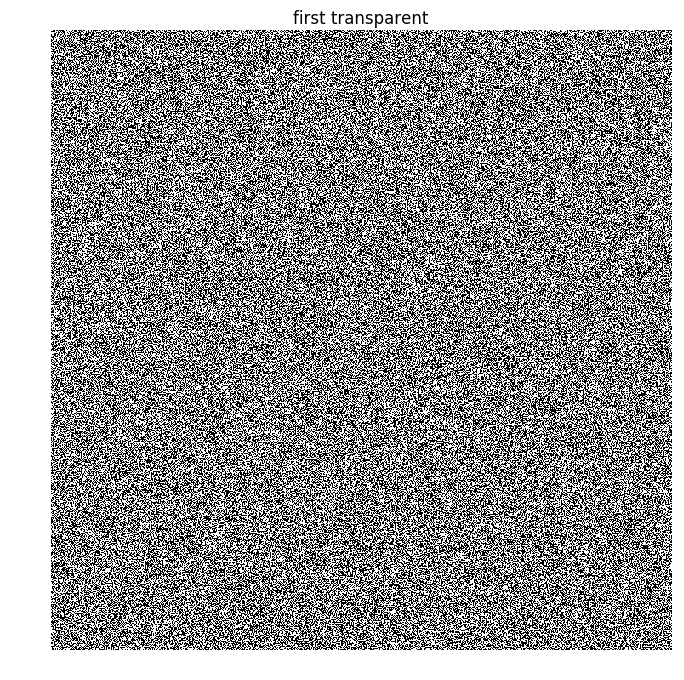

In [3]:
img = produce_image_layer_from_real_image("image_sqrpnt.png")
shares = img.produce_two_shares_from_image()
plot_matrix(shares[0], title='first transparent')


#  Second transparent

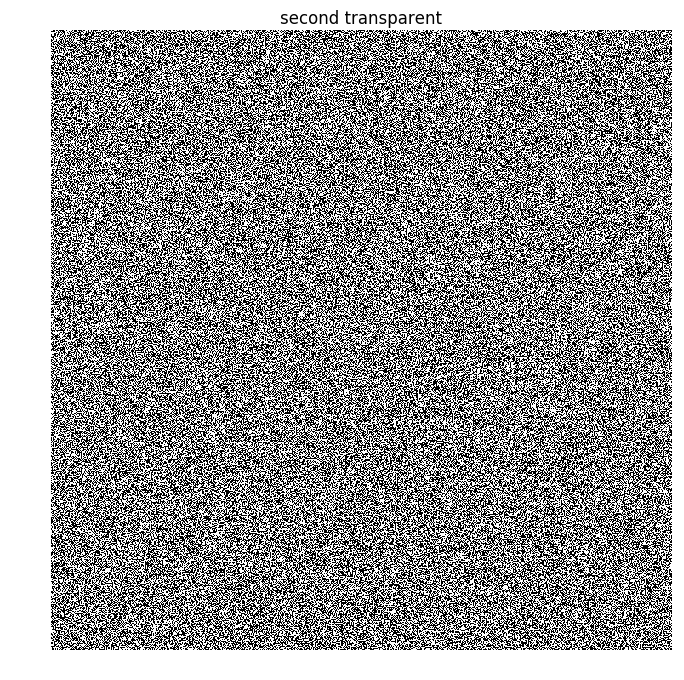

In [4]:
plot_matrix(shares[1], title='second transparent')


#  Stacking the two transparents togheter

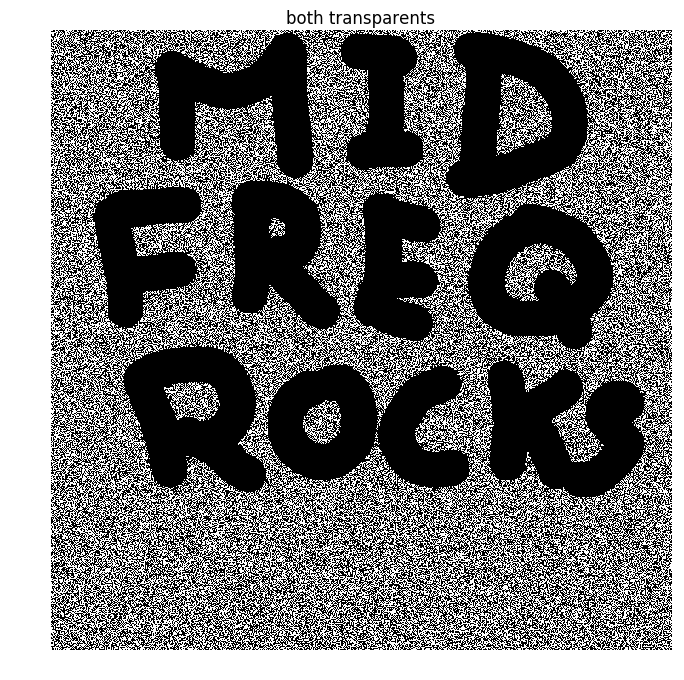

In [5]:
sum_of_the_shares = shares[0] * shares[1]  # note that matplotlib associates 0 to black and 1 to white
plot_matrix(sum_of_the_shares, title="both transparents")

### remarks

*   The person that creates encrypt the message is called the *dealer*

*   One of the transparent can be called the *cypher* and the other the *key*.

*   A crytosystem is said to be *secure* if, without the key, it impossible to
    know the original message from the cypher.


#  Let's look at what happend

##  We started by an image

This image is said as the *message*

![image initiale](files/sqrpnt_logo.png)



##  We splitted the image into many pixels

![pixel decomposition of the original image](files/image_pixelized.png)

## construct transparent methodology

We construct each transparent in a pixel by pixel fashion.

/home/didier/dev/go/src/github.com/didiercrunch/shamir/env/lib/python3.5/site-packages/ipykernel/__main__.py:43: RuntimeWarning: divide by zero encountered in log


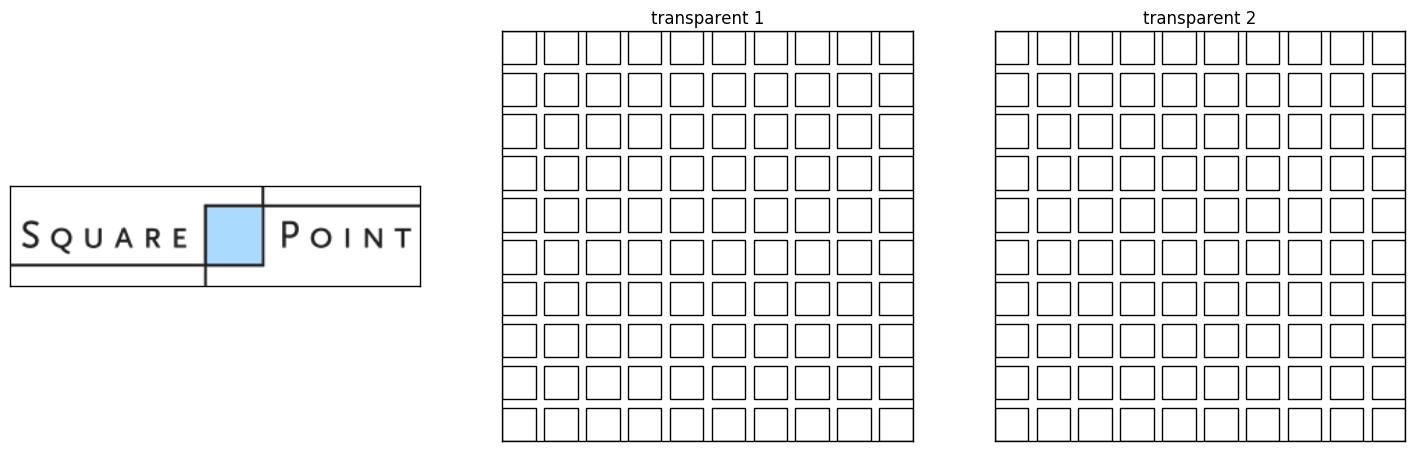

In [6]:
fig, (ax0, ax1, ax2 ) = plt.subplots(ncols=3)

img=matplotlib.image.imread('sqrpnt_logo.png')
do_not_show_axis(ax0)
ax0.imshow(img)

show_sub_pixel([[white]*10]*10, ax=ax1, title="transparent 1")
show_sub_pixel([[white]*10]*10, ax=ax2, title="transparent 2")




## Encrypting each pixels

To encrypt a pixel, we'll decompose it in $m$ sub-pixel.  Each sub-pixel can be black or white.

*  The humain eye will approximate the $m$ sub-pixel in a pixel

*  If there are enought black sub-pixels, the eye will see a black pixel

*  If there are not enought of black sub-pixels, the eye will see a white pixel

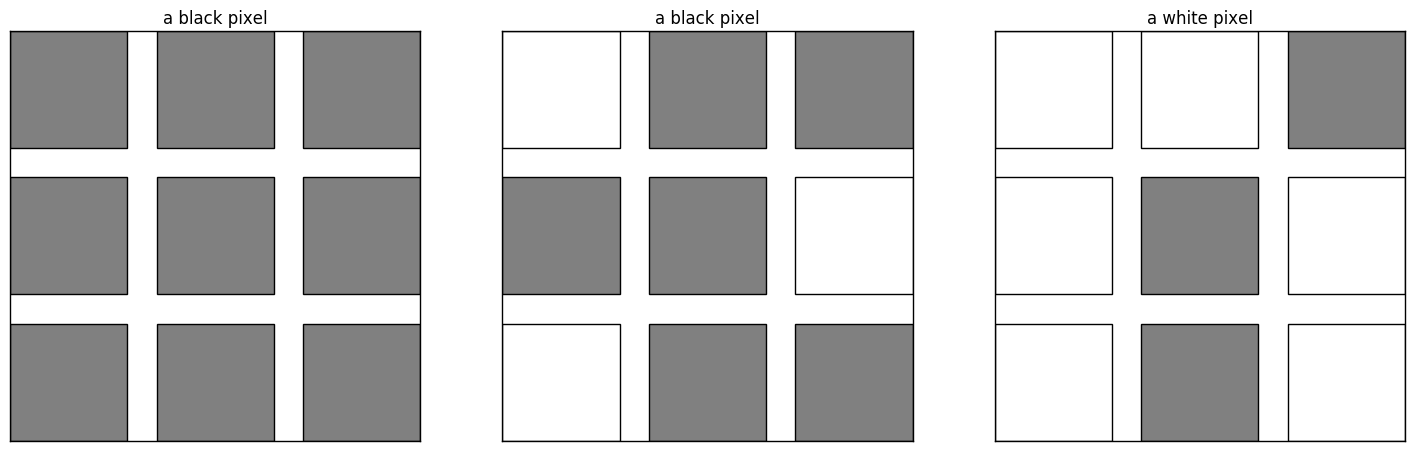

In [7]:
fig, (ax0, ax1, ax2 ) = plt.subplots(ncols=3)

show_sub_pixel([[black, black, black],
                [black, black, black], 
                [black, black, black]],
               ax=ax0,
               title="a black pixel")

show_sub_pixel([[white, black, black],
                [black, black, white], 
                [white, black, black]],
               ax=ax1,
               title="a black pixel")

show_sub_pixel([[white, white, black],
                [white, black, white], 
                [white, black, white]],
               ax=ax2,
               title="a white pixel")





## techinical objectives

To help the humain, we need the black to be as dark as possible and the white to be
as bright as possible

#### black pixel

A pixel is said to be *black* if it is made of at least $d \leq m$ black sub-pixels

#### white pixel

A pixel is said to be *white* if it is made of no more than $d - \alpha m$ black sub-pixels






## remarks

*  $m$ is the number of sub-pixels in a pixel

*  Bigger $d$ is, darker the blacks are

*  Bigger $\alpha$ is, brighter the whites are.

*  $\alpha$ represent here a "distance" between the white and black.  Greather this distance
   will be easier it will be to distinguist between the blacks and whites

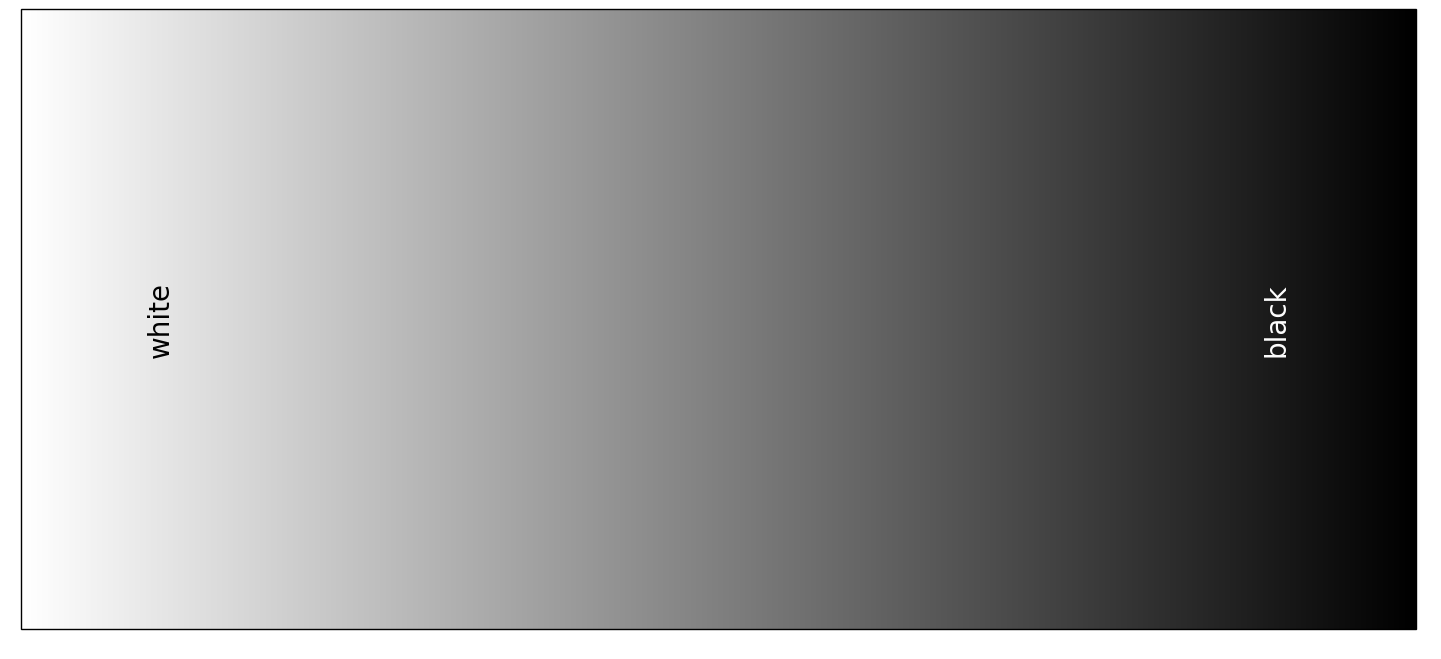

In [8]:
import matplotlib as mpl

fig, ax = pylab.subplots()

cmap = mpl.cm.gray_r
norm = mpl.colors.Normalize(vmin=5, vmax=10)
cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                   norm=norm,
                                   orientation='horizontal')

ax.set_axis_off()
ax.text(0.9, 0.5, 'black',
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        size="20",
        color="white",
        transform=ax.transAxes)

ax.text(0.1, 0.5, 'white',
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        size="20",
        color="black",
        transform=ax.transAxes)
pylab.show()

## encryption

In a way or an other, for each pixel we figured out sub-pixel to place on each transparent
such that.

*  when stacked, they form the the original image

*  with only one transparent, it is impossible to know what is the original image

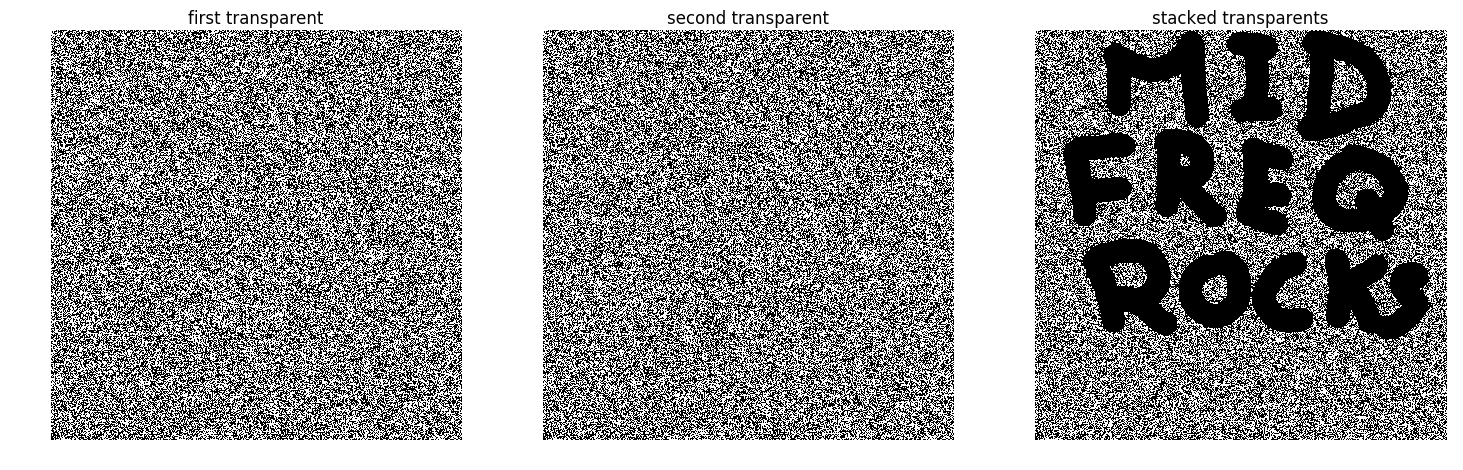

In [9]:
fig, (ax0, ax1, ax2 ) = plt.subplots(ncols=3)

plot_matrix(shares[0], title='first transparent', ax=ax0)
plot_matrix(shares[1], title='second transparent', ax=ax1)
plot_matrix(shares[1] * shares[0], title='stacked transparents', ax=ax2)

#  Some formalization

## Definition of a *pixel* structure

We encode a pixel in an array of size $m$, $[ p_1, p_2, \dots, p_m ]$

*  where $i$ represents a specific sub-pixel position

*  the $i^th$ sub-pixel is black is $p_i$ is $1$ and white if $p_i$ is $0$

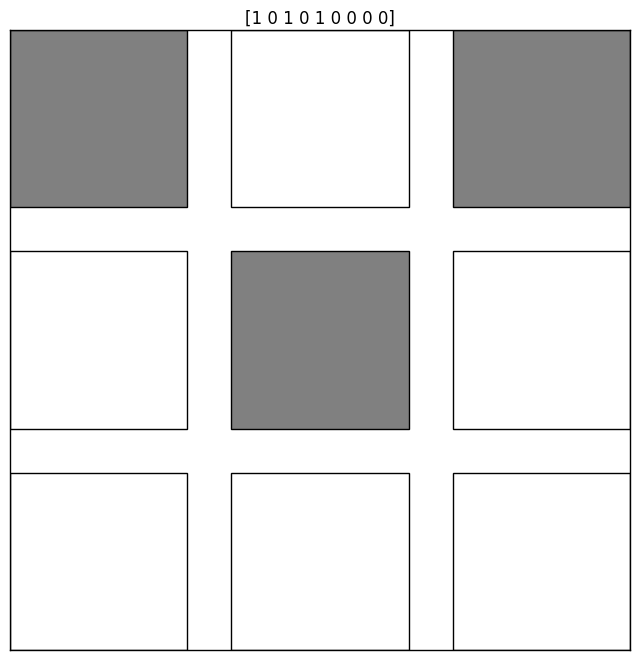

In [10]:
show_sub_pixel([[black, white, black],
                [white, black, white], 
                [white, white, white]], title="[1 0 1 0 1 0 0 0 0]")

## transparent superposition

Consequently the transparent superposition can be seen as componentwise *or* operation


```
   [1 0 1 0 ]
+  [1 1 0 0 ]
-----------------------
   [1 1 1 0 ]

```

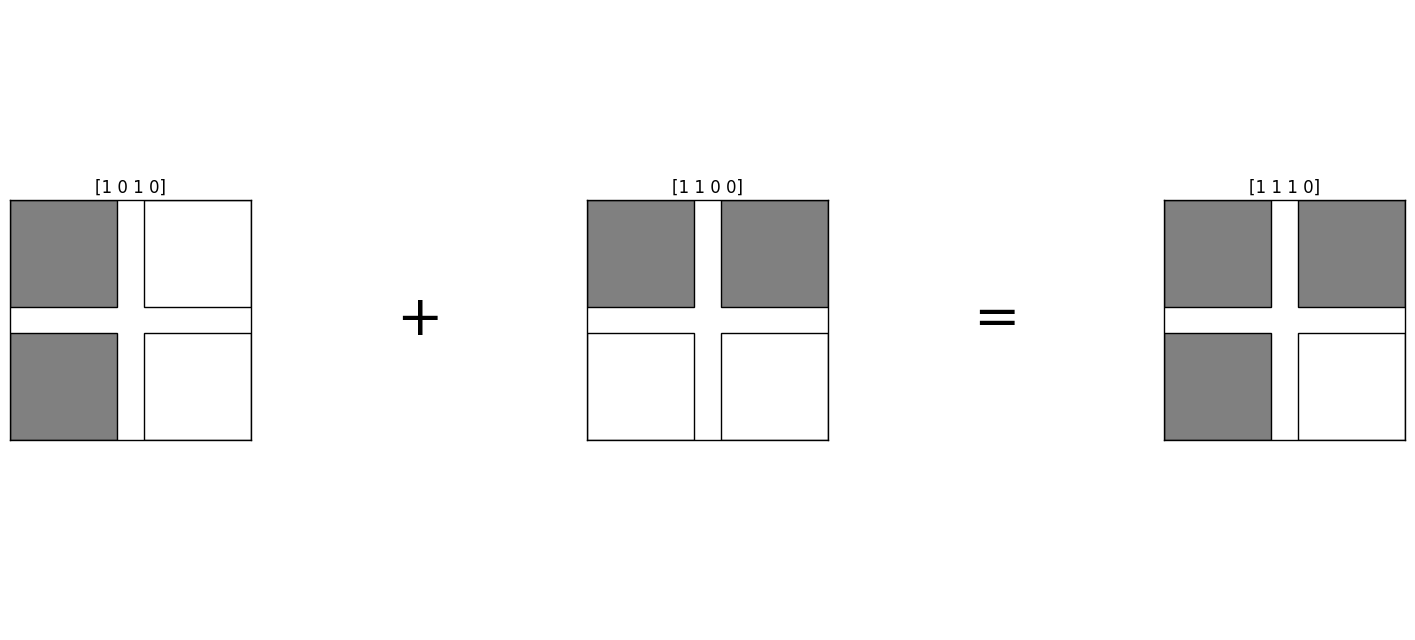

In [11]:
fig, (ax0, ax1, ax2, ax3, ax4 ) = plt.subplots(ncols=5)
show_sub_pixel([[black, white],
                [black, white]], title="[1 0 1 0]", ax=ax0)

show_text("+", ax1)

show_sub_pixel([[black, black],
                [white, white]], title="[1 1 0 0]", ax=ax2)

show_text("=", ax3)

show_sub_pixel([[black, black],
                [black, white]], title="[1 1 1 0]", ax=ax4)


# encryption...

How can we encode a pixel $P$ (black or white) in two pixels $Q_1$ $Q_2$ such that...

1.  $Q_1 + Q_2 \sim P$

2.  Without having access to $Q_1$ **and** $Q_2$, we grain no knowledge on  $P$

$$
    Prob(\text{P is white} | Q_i) =  Prob(\text{P is black} | Q_i)
$$


$A \sim B$ if $A$ is the same colour as $B$

## solution

We create two sets

$W = \{ (r_1, l_1) , (r_2, l_2), \dots, (r_k, l_k) \}$

$K = \{ (g_1, d_1) , (g_2, d_2), \dots, (g_k, d_k) \}$

such that...

1.  $r_i + l_i$ is white

2.  $g_i + d_i$ is black

3.  The cardinality of $x$ in the multiset $\{r_1, l_1, \dots r_k, l_k\}$ is
    the same in the multiset $\{g_1, d_1, \dots g_k, d_k\}$.

#  A working example

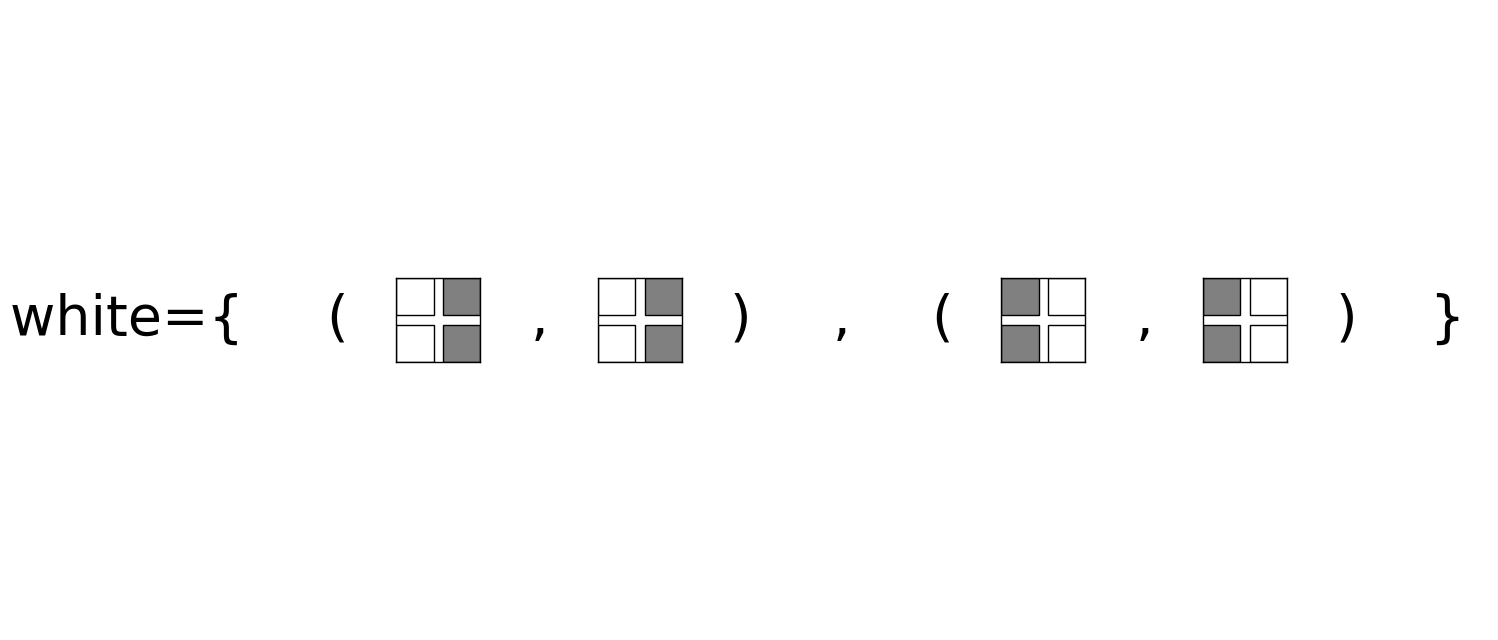

In [12]:
fig, axs = plt.subplots(ncols=14)

pixel = lambda a, b, c, d : [[a, b], [c, d]]
w, b = white, black

show_text("white={ ", axs[0])
show_text("  ", axs[1])
plot_tuple_of_pixels(pixel(w, b, w, b), pixel(w, b, w, b), axs[2:])
show_text(",", axs[7])
plot_tuple_of_pixels(pixel(b, w, b, w), pixel(b, w, b, w), axs[8:])
show_text("}", axs[13])




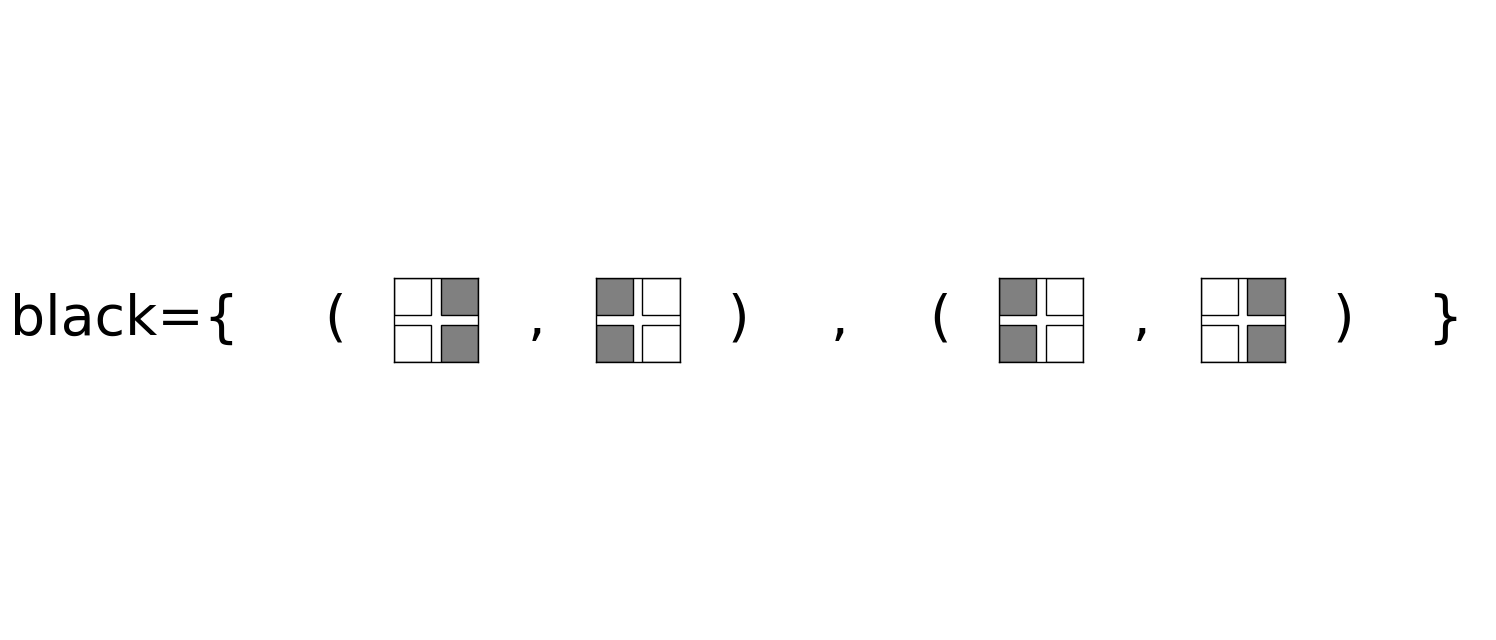

In [13]:
fig, axs = plt.subplots(ncols=14)

pixel = lambda a, b, c, d : [[a, b], [c, d]]
w, b = white, black

show_text("black={ ", axs[0])
show_text("  ", axs[1])
plot_tuple_of_pixels(pixel(w, b, w, b), pixel(b, w, b, w), axs[2:])
show_text(",", axs[7])
plot_tuple_of_pixels(pixel(b, w, b, w), pixel(w, b, w, b), axs[8:])
show_text("}", axs[13])


#  An other working example

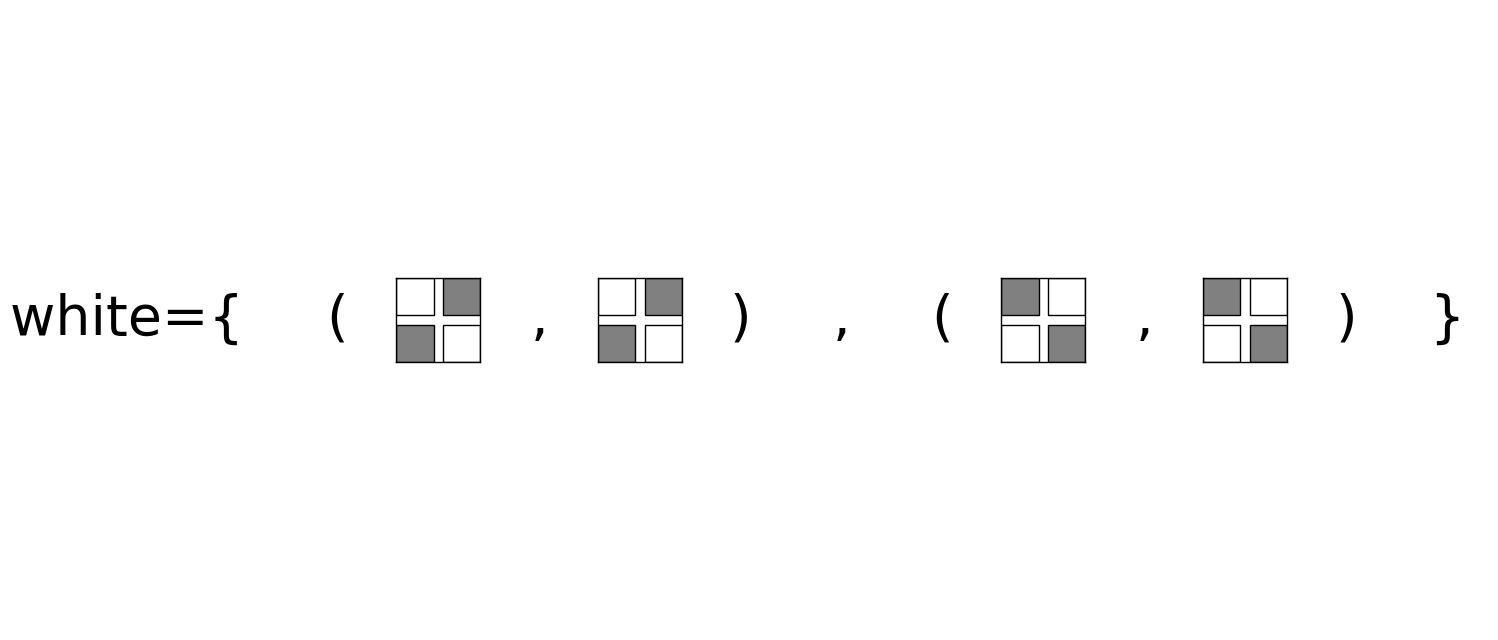

In [14]:
fig, axs = plt.subplots(ncols=14)

pixel = lambda a, b, c, d : [[a, b], [c, d]]
w, b = white, black

show_text("white={ ", axs[0])
show_text("  ", axs[1])
plot_tuple_of_pixels(pixel(w, b, b, w), pixel(w, b, b, w), axs[2:])
show_text(",", axs[7])
plot_tuple_of_pixels(pixel(b, w, w, b), pixel(b, w, w, b), axs[8:])
show_text("}", axs[13])


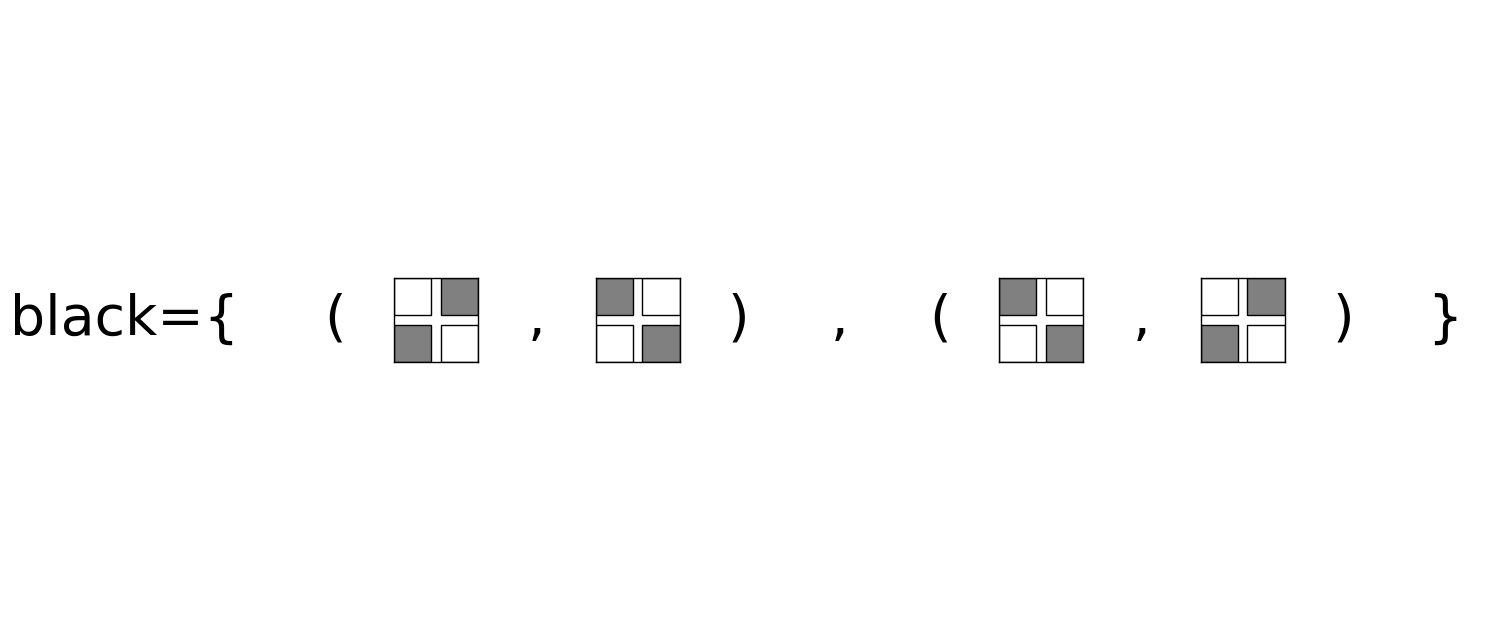

In [15]:
fig, axs = plt.subplots(ncols=14)

pixel = lambda a, b, c, d : [[a, b], [c, d]]
w, b = white, black

show_text("black={ ", axs[0])
show_text("  ", axs[1])
plot_tuple_of_pixels(pixel(w, b, b, w), pixel(b, w, w, b), axs[2:])
show_text(",", axs[7])
plot_tuple_of_pixels(pixel(b, w, w, b), pixel(w, b, b, w), axs[8:])
show_text("}", axs[13])


#  A simpler working example

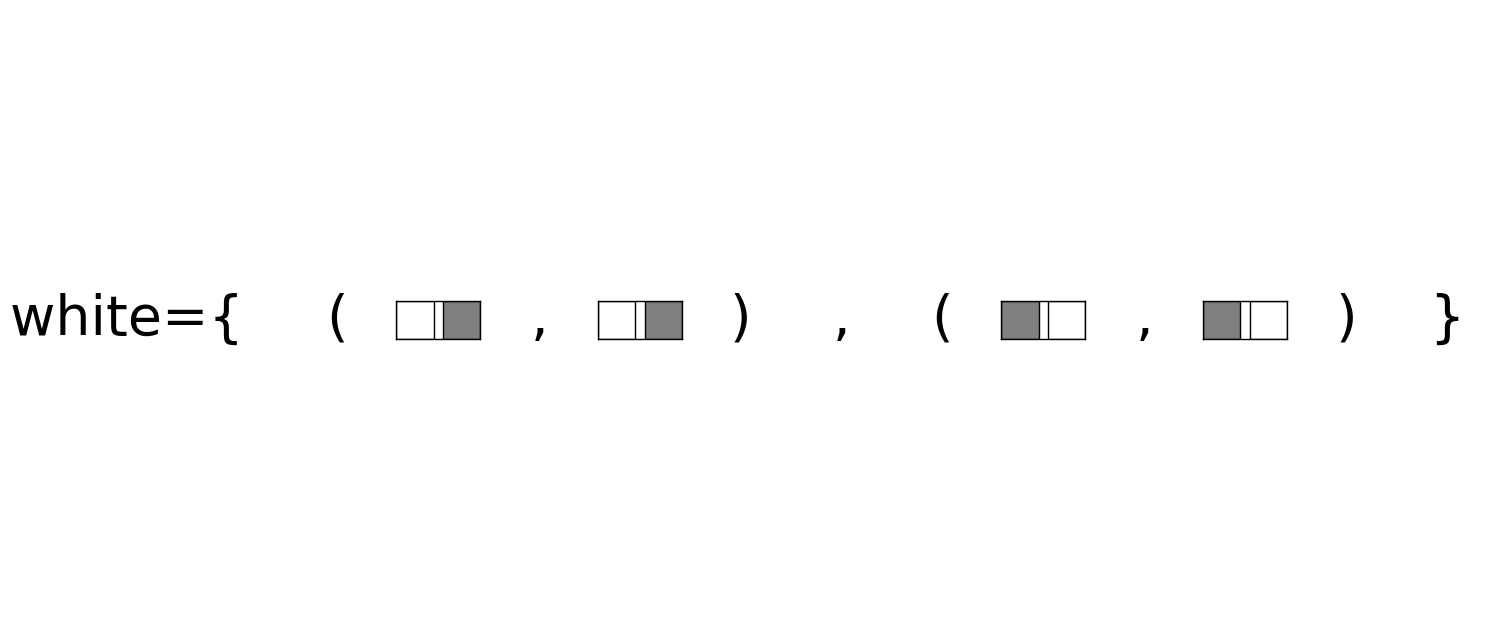

In [16]:
fig, axs = plt.subplots(ncols=14)

pixel = lambda a, b : [[a, b]]
w, b = white, black

show_text("white={ ", axs[0])
show_text("  ", axs[1])
plot_tuple_of_pixels(pixel(w, b), pixel(w, b), axs[2:])
show_text(",", axs[7])
plot_tuple_of_pixels(pixel(b, w), pixel(b, w), axs[8:])
show_text("}", axs[13])

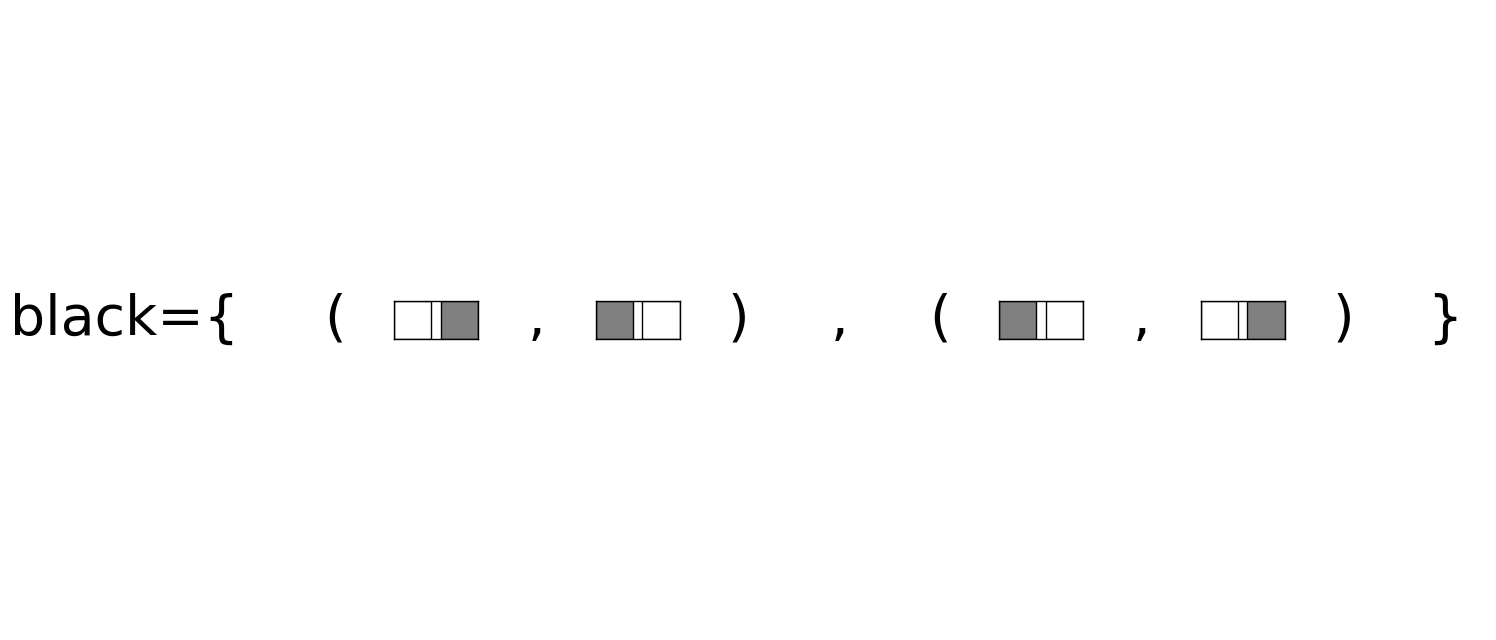

In [17]:
fig, axs = plt.subplots(ncols=14)

pixel = lambda a, b : [[a, b]]
w, b = white, black

show_text("black={ ", axs[0])
show_text("  ", axs[1])
plot_tuple_of_pixels(pixel(w, b), pixel(b, w), axs[2:])
show_text(",", axs[7])
plot_tuple_of_pixels(pixel(b, w), pixel(w, b), axs[8:])
show_text("}", axs[13])

#  A possible attack?

# Yes!

# the last person that shows its transparent can cheat.

By crafting its own transparent, knowing the other transparent,
a cheater could show whatever he wants as a results

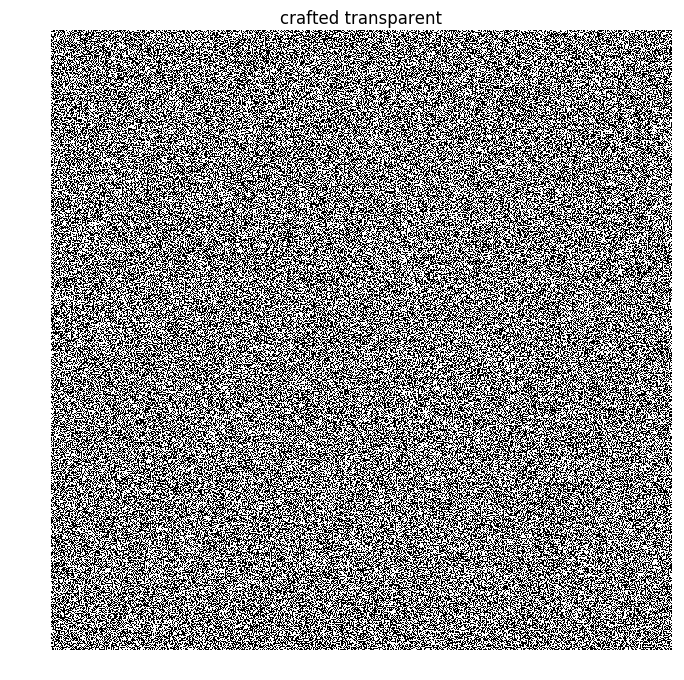

In [18]:
cheated = produce_image_layer_from_real_image("cheatedimage_sqrpnt.png")
cheated_share = cheated.produce_cheated_image_from_other_share(shares[0])

plot_matrix(cheated_share , title='crafted transparent')

savefig("crafted_transparen.pdf")


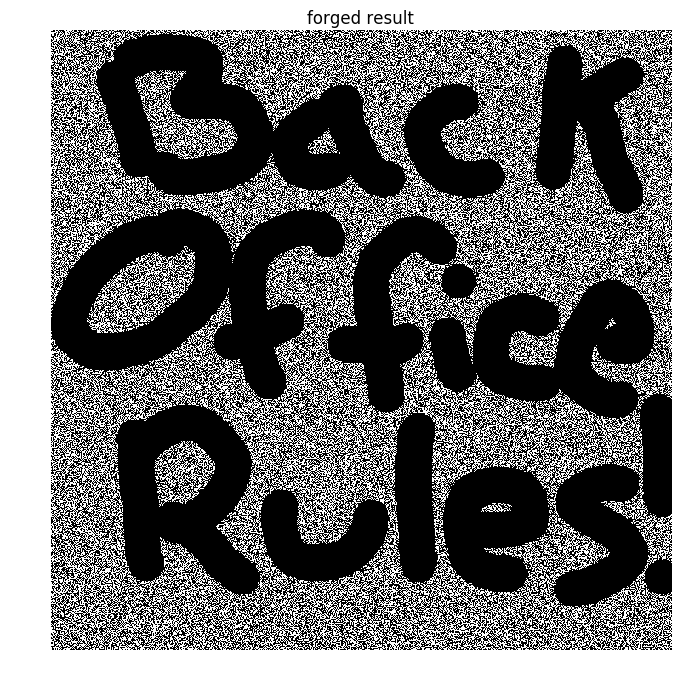

In [19]:
plot_matrix(cheated_share * shares[0], title='forged result')


### [2] Sharing a secret



## objectives

Let's present [Shamir's](http://en.wikipedia.org/wiki/Shamir's_Secret_Sharing) ideas of secret sharing.



### the problem

*Alice* wants to share his swiss bank account number with *Bob TheFirst*, *Bob TheSecond*, *Bob TheThird*,... *Bob TheNth* such that...

1.  If any $k$ *Bob*s comes togheter they need to be able to recover the bank account number

2.  If any less that $k$ *Bob*s comes togheter they need to have no idea whatsoever about the bank account number



~~~
                 ***********
               ***** ***********
            ** ****** *** ********
           ****  ******  ** *******
           ***     ******* ** ******
           ***       **        *  **
            *|/------  -------\ ** *
             |       |=|       :===**
              |  O  |   | O   |  }|*
               |---- |   ----  |  |*
               |    |___       |\/
               |              |
               \   -----     |
                \           |
                  -__ -- -/
~~~

#  shamir solution:  use polynomials!

### definition

A polynomial is a function that can be written as

$$
    a_0 + a_1 \cdot x^1 + a_2 \cdot x^2 + \dots + a_n \cdot x^n
$$

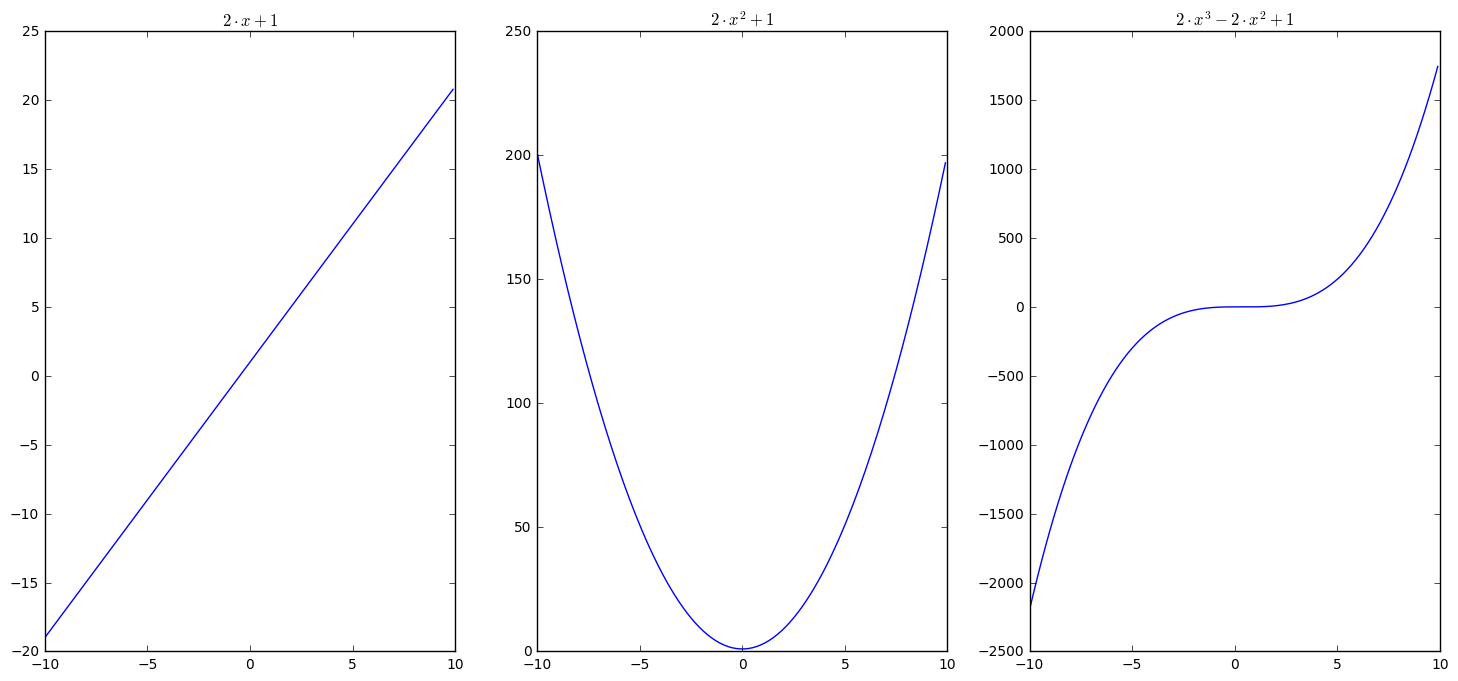

In [20]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3)
plot_function(lambda x : 2 * x + 1, title="$2 \cdot x + 1$", ax=ax0)
plot_function(lambda x : 2 * x**2 + 1, title="$2 \cdot x^2 + 1$", ax=ax1)
plot_function(lambda x : 2 * x**3 - 2 * x**2 + 1, title="$2 \cdot x^3 - 2 \cdot x^2  + 1$", ax=ax2)

### important feature of polynomials

Any $n + 1$ points define an unique polynomials of degre $n$.

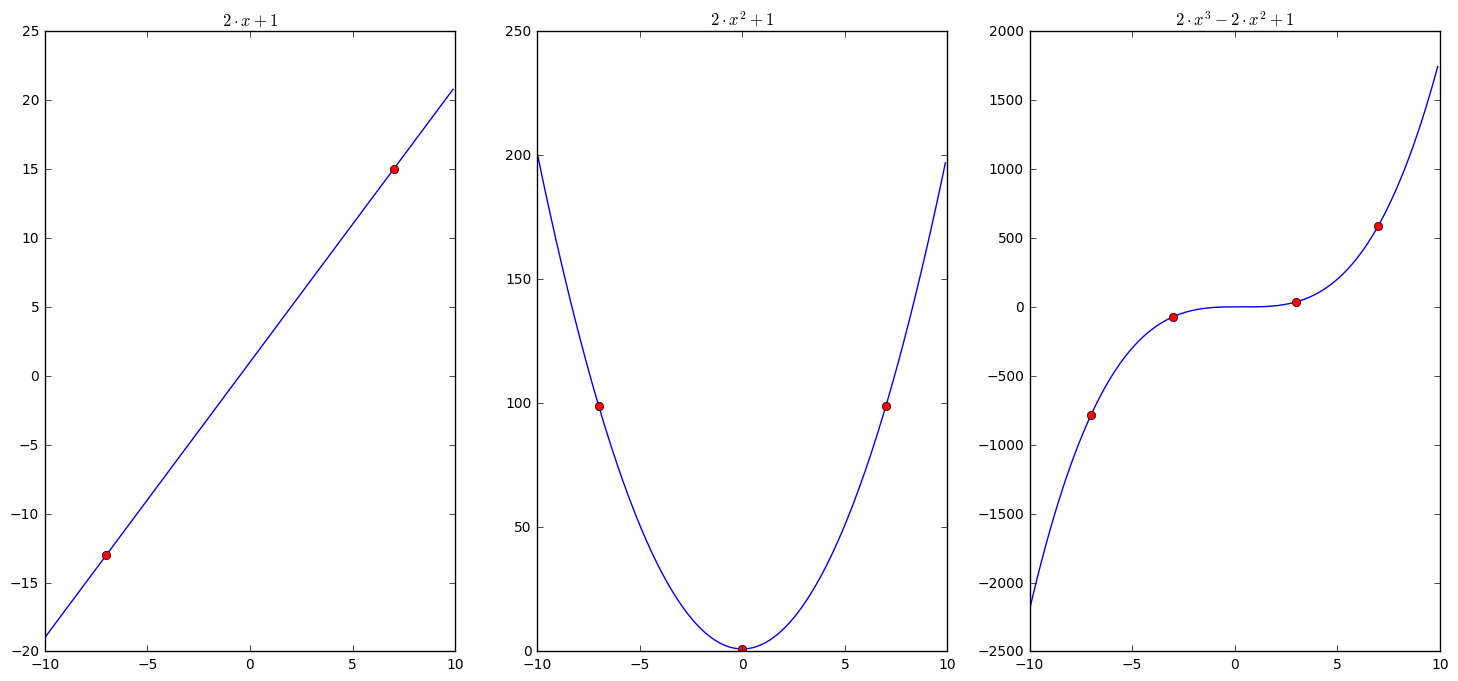

In [21]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3)

p = lambda x : 2 * x + 1
plot_function(p, title="$2 \cdot x + 1$", ax=ax0)
ax0.plot([-7, 7]  , [p(-7), p(7)], "ro")

p = lambda x : 2 * x**2 + 1
plot_function(p, title="$2 \cdot x^2 + 1$", ax=ax1)
ax1.plot([-7, 0, 7], [p(-7), p(0), p(7)], "ro")



p = lambda x : 2 * x**3 - 2 * x**2 + 1
plot_function(p, title="$2 \cdot x^3 - 2 \cdot x^2  + 1$", ax=ax2)
ax2.plot([-7, -3, 3, 7], [p(-7), p(-3), p(3), p(7)], "ro")
show()

###Similarly,

by $n$ points pass an infinite number of polynomials of degree $n$

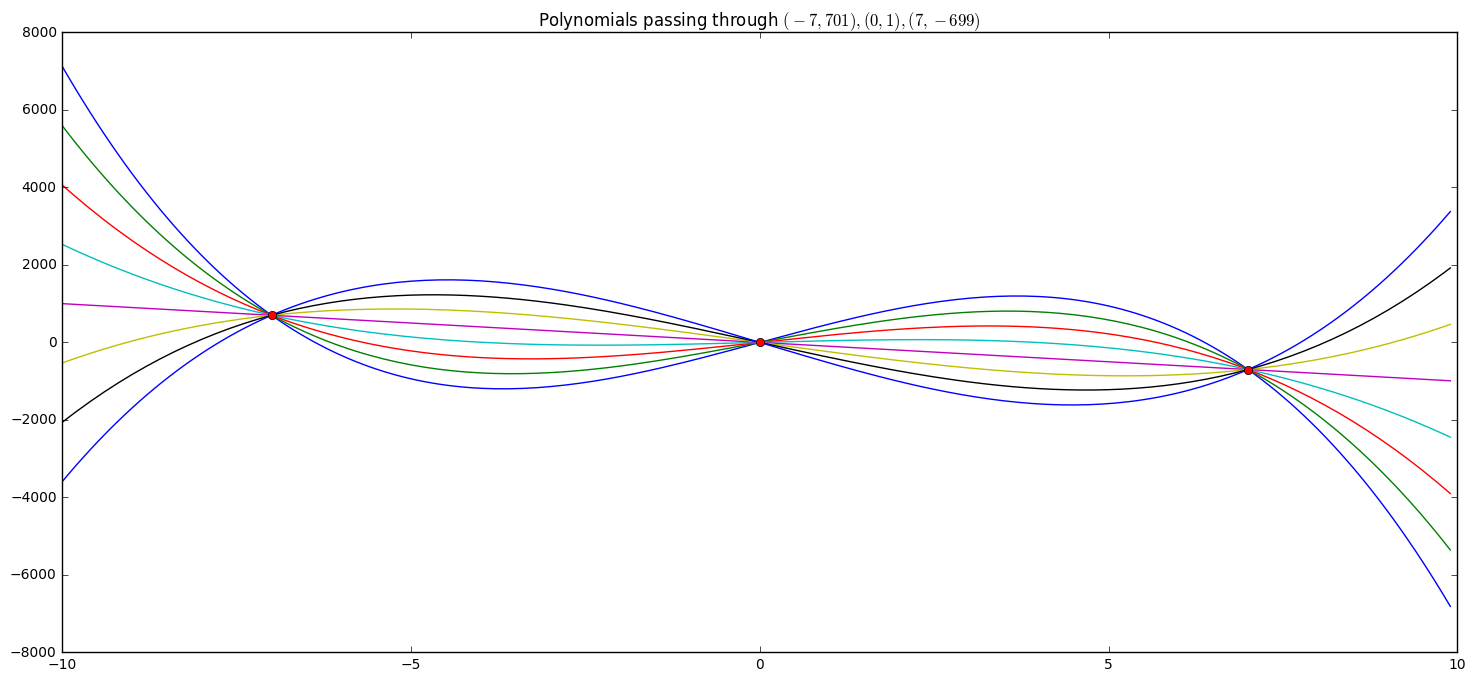

In [49]:
fig, ax = plt.subplots()

b = 0
d = 1
c = lambda a : -100 - 7**2 * a

P = lambda a : (lambda x: a * x**3 + b * x**2 + x * c(a) + d)

for i in range(-12, 12, 3):
    plot_function(P(i), ax=ax)


p = P(1)
ax.plot([-7, 0, 7]  , [p(-7), p(0), p(7)], "ro")
ax.set_title("Polynomials passing through $(-7, 701), (0, 1), (7, -699)$")
None

### Shamir's secret sharing

*  Alice needs to create a random polynomial of degre $k-1$ such that $a_0$ is the
   secret to share.

$$ P(x) = a_0 + a_1 \cdot x^1 + a_2 \cdot x^2 + \dots + a_{k-1}\cdot x^{x-1} $$

*  Alice gives to each *Bob TheIth* the couple $(i, P(i))$


### secret recovery

If $K$ bob comes togheter, they can figure out the secret polynomial $P(x)$ and compute $P(0)$

#  interesting facts

*  the number $n$ needs not to be known at first. (Additional bobs can
   come and join the party!)


*  the number $k$ is fixed forever


*  the fact that we evaluate $P(x)$ at $0$ helps tremendously in
   the algebraic resolution of the problems


*  the Shamir's secret sharing is at the base of almost every "threshold"
   cryptography
 

#  small example to see if everything works

*Francis* wants to share between *Valentin* and *Didier* the
company's credit card: `5243 9021 9129 1828`.


In [23]:
p = lambda x : 5243902191291828 + 7873787349 * x + 7893478934 * x ** 2
credit_card_number = 5243902191291828
valentin_secret = p(1) # keyboard random number
didier_secret = p(2)

### step 1

Francis chooses the bellow polynomials because he likes it very much

$$P(X) = 5243902191291828 + 7873787349\cdot x + 7893478934\cdot x^2$$

#### step 2

*  Peter gives $(1, 5243917958558111)$ to Valentin
*  Peter gives $(2, 5243949512782262)$ to Didier

## As we all expect...

Didier will try to figure out the credit card number to buy a
truck load of beer.

###  Can Didier acheve its goal?

## Let's resume what Didier knows

1.  He knows that he is looking for a number $a_0$ of 12 digits

2.  $a_0$ is positive

3.  $a_0$ is an integer


### But if didier does a little bit of algebra...

...
$$P(x) = a_0 + a_1 \cdot x + a_2 \cdot x^2 $$
$$5243949512782262 = a_0 + a_1 \cdot 2 + a_2 \cdot 4 $$
$$a_0 = 5243949512782262 - a_1 \cdot 2 -  a_2 \cdot 4$$
$$a_0 = 5243949512782262 - 2\cdot(a_1 \cdot -  2 \cdot a_2)$$
$$a_0 = 5243949512782262 - \text{even number}$$

## Hence...

*  Didier knows the credit card number is even

*  With the help of *EC2* Didier can find the solution in a relative small amount of time.



#  What can we do to avoid such situation?

1.  We could process the original message before wharing it

    $$\underbrace{xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx}_\text{very random number}\underbrace{5243902191291828}_\text{the credit card number}$$

2.  We could work in a more appropriate field

    $$\mathbb{Z}/p\mathbb{Z}$$

# What is $\mathbb{Z}/p\mathbb{Z}$ ?

*  $p$ is (very large) prime


*  $\mathbb{Z}/p\mathbb{Z}$ is the set of all the integers between $0$ and $p-1$


*  we can add two elements of $\mathbb{Z}/p\mathbb{Z}$ as usual.  If the result
   is larger than $p$ we *loop* using the modulo operation


*  we can multiply two elements of $\mathbb{Z}/p\mathbb{Z}$ as usual.  If the result
   is larger than $p$ we *loop* using the modulo operation

#  Uber important things


*  Almost everything you know about the "numbers" is still
   true in $\mathbb{Z}/p\mathbb{Z}$ 
   
   
*  In particular, each element has a multiplicative inverse

##  example $\mathbb{Z}/7\mathbb{Z}$

| x | 0 | 1 | 2 | 3 | 4 | 5 | 6 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 1 | 0 | 1 | 2 | 3 | 4 | 5 | 6 |
| 2 | 0 | 2 | 4 | 6 | 1 | 3 | 5 |
| 3 | 0 | 3 | 6 | 2 | 5 | 1 | 4 |
| 4 | 0 | 4 | 1 | 5 | 2 | 6 | 3 |
| 5 | 0 | 5 | 3 | 1 | 6 | 4 | 2 |
| 6 | 0 | 6 | 5 | 4 | 3 | 2 | 1 |

| + | 0 | 1 | 2 | 3 | 4 | 5 | 6 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 0 | 0 | 1 | 2 | 3 | 4 | 5 | 6 |
| 1 | 1 | 2 | 3 | 4 | 5 | 6 | 0 |
| 2 | 2 | 3 | 4 | 5 | 6 | 0 | 1 |
| 3 | 3 | 4 | 5 | 6 | 0 | 1 | 2 |
| 4 | 4 | 5 | 6 | 0 | 1 | 2 | 3 |
| 5 | 5 | 6 | 0 | 1 | 2 | 3 | 4 |
| 6 | 6 | 0 | 1 | 2 | 3 | 4 | 5 |

# back to polyominals... (but int $\mathbb{Z}/p\mathbb{Z}$)


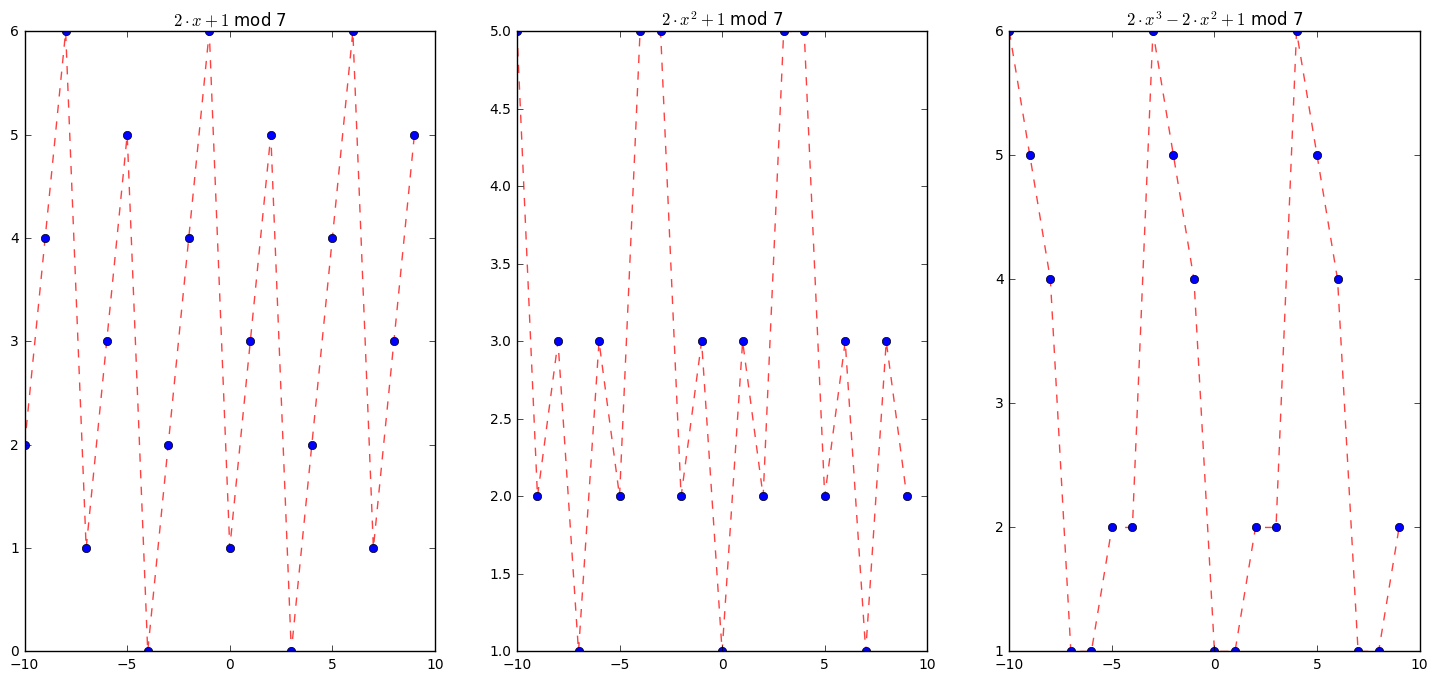

In [24]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3)
plot_function_in_finite_field(lambda x : (2 * x + 1) % 7, title="$2 \cdot x + 1$ mod 7", ax=ax0)
plot_function_in_finite_field(lambda x : (2 * x**2 + 1) % 7, title="$2 \cdot x^2 + 1$ mod 7", ax=ax1)
plot_function_in_finite_field(lambda x : (2 * x**3 - 2 * x**2 + 1) % 7, title="$2 \cdot x^3 - 2 \cdot x^2  + 1$ mod 7", ax=ax2)

##  The main two polyominals facts are still (almost) true

### Any $n + 1$ points define an unique polynomial of degre $n$.

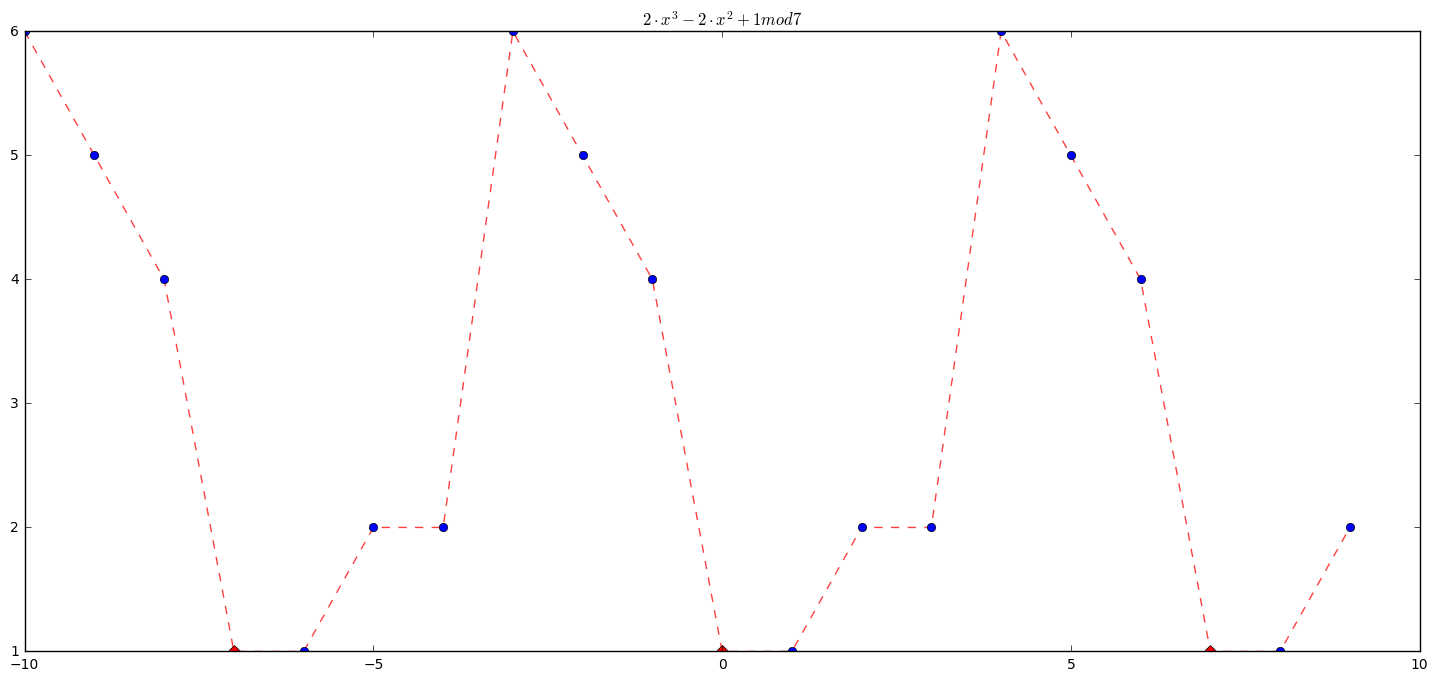

In [48]:
fig, ax = plt.subplots()
f = lambda x : (2 * x**3 - 2 * x**2 + 1) % 7
plot_function_in_finite_field(f, title="$2 \cdot x^3 - 2 \cdot x^2  + 1 mod 7$", ax=ax)
ax.plot([-7, 0, 7], [f(-7), f(0), f(7)], 'rD')

None

### By  $n$ points pass $p$ polyomials of degree $n$.

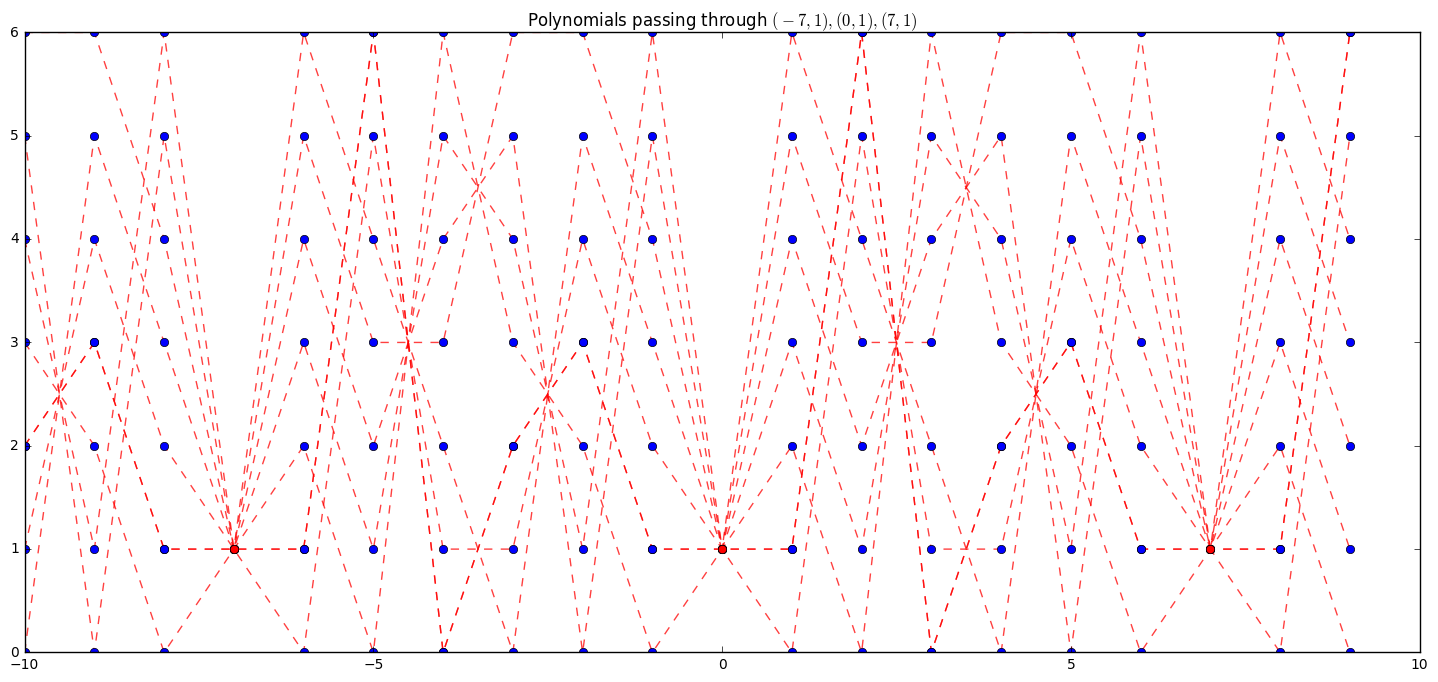

In [47]:
fig, ax = plt.subplots()

b = 0
d = 1
c = lambda a : -100 - 7**2 * a

P = lambda a : (lambda x: (a * x**3 + b * x**2 + x * c(a) + d) % 7)

for i in range(-12, 12, 3):
    plot_function_in_finite_field(P(i), ax=ax)


p = P(1)
ax.plot([-7, 0, 7]  , [p(-7), p(0), p(7)], "ro")
ax.set_title("Polynomials passing through $(-7, 1), (0, 1), (7, 1)$")

None

## back to Shamir's secret sharing

If Francis would have choosen polynomials in $\mathbb{Z}/p\mathbb{Z}$ with $p$ big enough...

1.  Didier could not have easely discarted some numbers

2.  For Didier, a large $p$ in infinite even with the help of $aws$

### [3] Password alternative

The objective of this sections is to present the idea of the
article [how to proof yourself](http://www.cs.rit.edu/~jjk8346/FiatShamir.pdf),
an article publish by Fiat and Shamir in the year of grace 1987.

### Idea

The idea is to be able to proof the knowledge of something an information revealing how come we know it.

*  To prove that you know how to cook a carrot cake without providing one

*  To prove that you can decrypt a message without revealing the message

##  Objective

The objective is to find a way to allow *Susie* to authenticate to *Calvin* such that...

1.   Susie can proof legetimate knowledge

2.   Calvin is sure that Susie cannot cheet

3.   Calvin does not lean any additional information


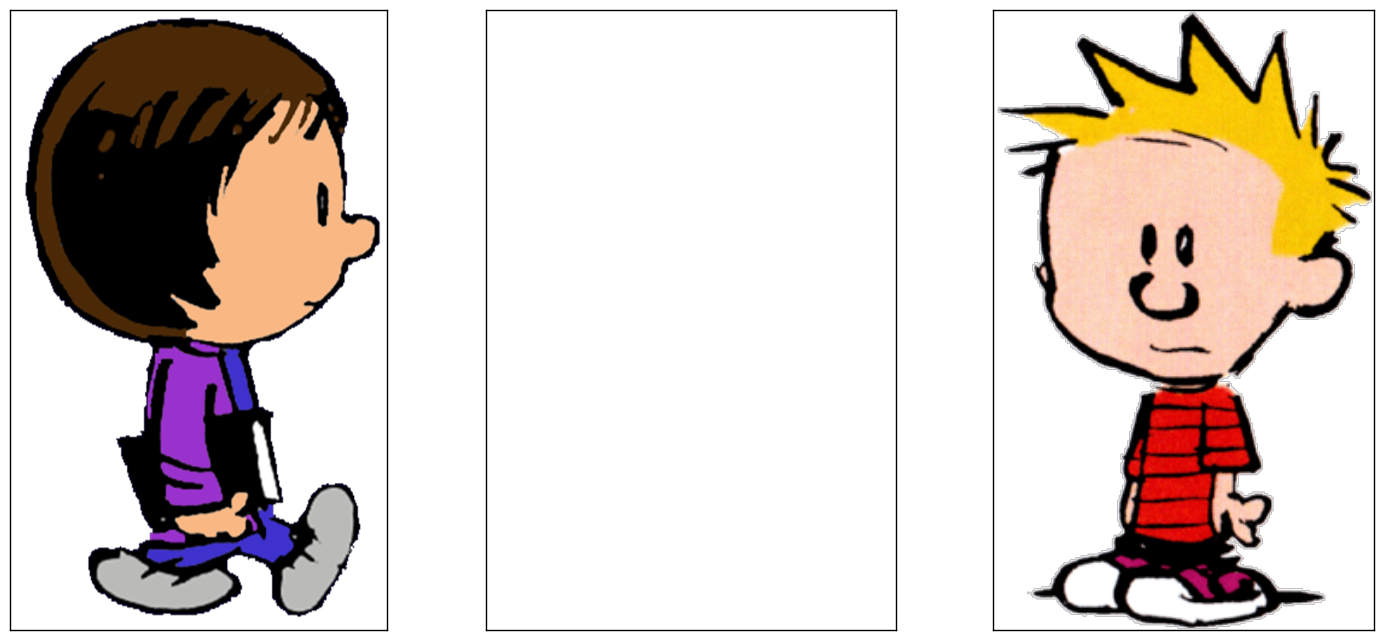

In [46]:
fig, (ax0, ax1, ax2 ) = plt.subplots(ncols=3)

img = matplotlib.image.imread('susie.png')
do_not_show_axis(ax0)
ax0.imshow(img)

do_not_show_axis(ax1)


img = matplotlib.image.imread('calvin.gif')
do_not_show_axis(ax2)
ax2.imshow(img)


None

### In the contect of a zero-knoledge proof with the proper wording...

1.  Completness
    * The prover will be able to convince the verifier

2.  Soundness
    *  The verifier will not get scammed by a malicious prover

3.  Zero-knowledge
    *  The prover will not transmit other knowledge than the wanted fact

##  Authentication

###  Normal login procedure

1.  Sign up and send your password
    >  username:  `didier`  password:  `******`

1.  The server keeps the the hash of your password
    >  `user = {"username": "didier", "hash":  "cXdlcnR5MTIzNA=="}`

1.  Each time you authenticate, the server verifies that the password you provides hashed to the same value

    >  `assert hash(password) == user["hash"]`

### Authentication with zero knowledge proof


1.  Sign up and send the hash of your password
    > totally private password:  `******`
    > username:  `didier`  hash:  `cXdlcnR5MTIzNA==`
    
1.  The server keeps the the hash
    >  `user = {"username": "didier", "hash":  "cXdlcnR5MTIzNA=="}`
    
1.  Each time you authenticate, there is a dance between the you and the server to allow the
    server to gain the knowledge that you know something that 
    
    

### how can we do that?


1.  Bob and Alice exchange some information while they know they are talking to the each other (sign up)

2.  In that exchange, Alice will tell Bob that she knows something
    
3.  Each time Alice will authenticate, Alice will provide enough information to Bob to demonstrate that she knows the 
    information but without giving any factual proofs.

#  quadratic residue

There are some problems that are easy to solve in $\mathbb{R}$ but very hard to solve in $\mathbb{Z}/n\mathbb{Z}$

#  quadratic residue

*  The quandratric residue of $x$ in $\mathbb{Z}/n\mathbb{Z}$ is an
   element $y$ such that $x^2 = y$
   
*  We say that $y$ is a *quadratic residue* if there exists $x$ such
   that $x^2 = y$

### facts

*  Not every element is a quadratic residue

*  It is **hard** to know if a number is a quadratic residue

*  It is easy to find a quadratic residue:  just take a random
   $r$ and compute $r^2$

#  Proving ourselves with quadratic residues...


### idea

The idea is that Sussie will demonstrate to Calvin that she knows that a certain element $x$ is a quadratic residue
without giving $\omega$ such that $\omega ^2 = x$

#  protocol...

| Susie                          | Calvin          |
|:------------------------------:|:---------------:|
| chose a random $r$             |                 |
| sends $a = r^2$                |                 |
|                                | send challenge **a** or **b** at random       |
| if challenge is **a** returns r    | accept if $r^2 = a$                   |
| if challenge is **b** returns $r\cdot\omega$ | accept is $(r\cdot\omega)^2 = a \cdot x$

*  completeness:
    If Alice plays the game, she will be to proof that she is herself with probability 1

*  soundness:
    Bob as a probablylity $1/2$ to catch a cheeter, he needs to repeat the protocol until he is convinced

*  zero-knowledge:
    Proof by intimidation